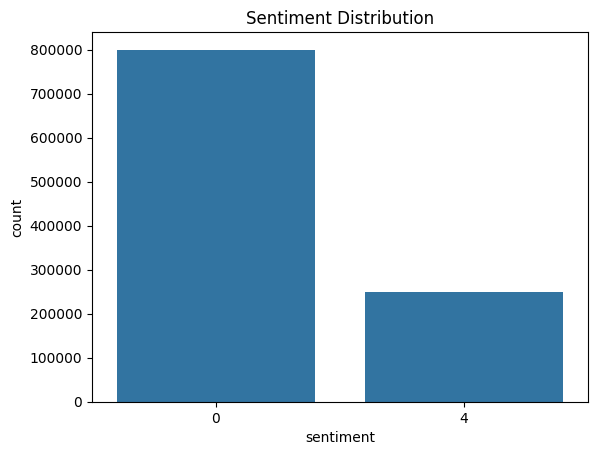

Accuracy: 0.8288208815731751
              precision    recall  f1-score   support

           0       0.85      0.94      0.89    160127
           1       0.71      0.46      0.56     49589

    accuracy                           0.83    209716
   macro avg       0.78      0.70      0.73    209716
weighted avg       0.82      0.83      0.81    209716



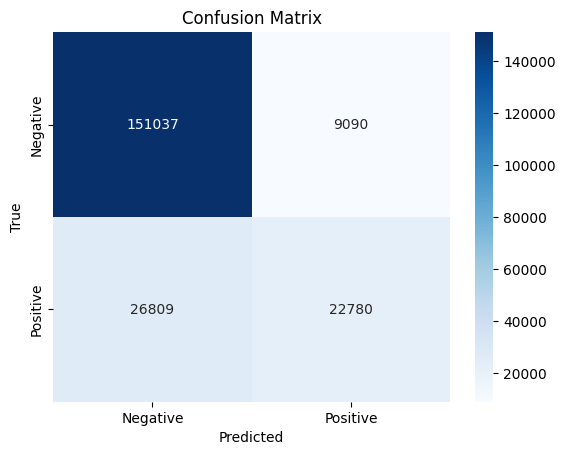


✅ Model and vectorizer saved successfully!


In [1]:
# train_sentiment_model.ipynb (full code with extended preprocessing and evaluation)

import pandas as pd
import numpy as np
import joblib
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("C:\\Users\\hp\\Documents\\SENTIMENT.csv", encoding='ISO-8859-1', header=None)
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

# Display class distribution
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# Simplify sentiment labels
df = df[["sentiment", "text"]]
df['sentiment'] = df['sentiment'].replace(4, 1)  # 0 = Negative, 1 = Positive

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Split the data
X = df['clean_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate
predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("\n✅ Model and vectorizer saved successfully!")


NameError: name 'st' is not defined